In [6]:
import pandas as pd
import json 
import numpy as np

The raw dataset  
- 903,653 rows

In [2]:
raw = pd.read_csv("./data/train.csv", delimiter=',', skipinitialspace=True)

/Users/sunyixin/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
len(raw)

903653

In [3]:
raw.loc[0:5,:]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194


**Extend the 'totals' column**:  
In the data dictionary, 'totals' column "contains aggregate values across the session."  
The sub-column transactionRevenue contains the revenue information we are trying to predict. This sub-column exists only for the training data.   

Extended the totals and converted the values to numerical.
There're 6 activities recorded:   
bounces, hits, newVisits, pageviews, transactionRevenue, visits.

In [20]:
# df['col'].apply(function)
stdf = raw['totals'].apply(json.loads)
mydata = raw.join(pd.DataFrame(stdf.tolist()).astype('float'))

In [ ]:
pd.DataFrame(stdf.tolist()).astype('float')

In [21]:
mydata.iloc[0:45,:]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1.0,1.0,1.0,1.0,NaN,1.0
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1.0,1.0,1.0,1.0,NaN,1.0
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1.0,1.0,1.0,1.0,NaN,1.0
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1.0,1.0,1.0,1.0,NaN,1.0
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1.0,1.0,NaN,1.0,NaN,1.0
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194,1.0,1.0,1.0,1.0,NaN,1.0
6,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1905672039242460897,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",1905672039242460897_1472817241,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472817241,1,1472817241,1.0,1.0,1.0,1.0,NaN,1.0
7,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",537222803633850821,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",537222803633850821_1472812602,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472812602,1,1472812602,1.0,1.0,1.0,1.0,NaN,1.0
8,Organic Search,20160902,"{""browser"": ""Internet Explorer"", ""browserVersi...",4445454811831400414,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",4445454811831400414_1472805784,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472805784,1,1472805784,1.0,1.0,1.0,1.0,NaN,1.0
9,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",9499785259412240342,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",9499785259412240342_1472812272,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""sourc

**FACTS**
- visitNumber: 2,046,681 (The session number for this user. If this is the first session, then this is set to 1.)
- visits(from totals): 903.653 (same with row #)
    - why? becuz the data is one session per row?
- from max to min: transactionRevenue > hits > pageviews > visits > newVisits > bounces
    - what do these values mean?

In [9]:
sum(mydata['visitNumber'])

2046681

In [33]:
mydata[['visits','bounces','hits','newVisits','pageviews','transactionRevenue']].sum(skipna=True)

visits                9.036530e+05
bounces               4.506300e+05
hits                  4.153675e+06
newVisits             7.030600e+05
pageviews             3.478466e+06
transactionRevenue    1.540071e+12
dtype: float64

Exploring the outcome variable transactionRevenue:  
- transaction rate: 1.27% (0.0127427231470487 )
- distribution of revenue: very concentrated

In [30]:
mydata['transactionRevenue'].max(skipna=True)

23129500000.0

In [37]:
mydata['transactionRevenue'].describe()

count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: transactionRevenue, dtype: float64

In [34]:
1.151500e+04/len(raw)

0.0127427231470487

In [35]:
1.000000e+04

10000.0

In [38]:
2.312950e+10

23129500000.0

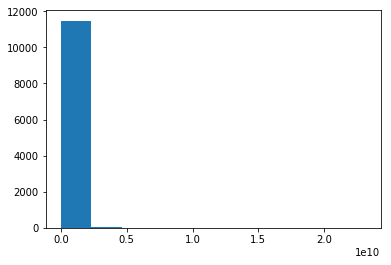

In [41]:
import pylab

pylab.figure()
pylab.hist(mydata.transactionRevenue[~np.isnan(mydata.transactionRevenue)])
pylab.show()

In [12]:
head = raw.totals[0:5]

In [13]:
head

0    {"visits": "1", "hits": "1", "pageviews": "1",...
1    {"visits": "1", "hits": "1", "pageviews": "1",...
2    {"visits": "1", "hits": "1", "pageviews": "1",...
3    {"visits": "1", "hits": "1", "pageviews": "1",...
4    {"visits": "1", "hits": "1", "pageviews": "1",...
Name: totals, dtype: object

In [34]:
data = pd.read_json(head[0], typ='series')

In [35]:
data

visits       1
hits         1
pageviews    1
bounces      1
newVisits    1
dtype: int64

In [38]:
pd.DataFrame(data).T

,visits,hits,pageviews,bounces,newVisits
0,1,1,1,1,1


In [19]:
type(data)

pandas.core.series.Series

In [29]:
import json

In [40]:
json.loads(head[0])

{'visits': '1',
 'hits': '1',
 'pageviews': '1',
 'bounces': '1',
 'newVisits': '1'}

In [65]:
sample=raw.loc[4:5,:]

In [66]:
sample

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194


In [68]:
stdf = sample['totals'].apply(json.loads)
pd.DataFrame(stdf.tolist())

,bounces,hits,newVisits,pageviews,visits
0,1,1,NaN,1,1
1,1,1,1,1,1


In [69]:
sample.join(pd.DataFrame(stdf.tolist()))

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,visits
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,NaN,NaN,NaN,NaN,NaN
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194,NaN,NaN,NaN,NaN,NaN
